In [1]:
import dypac as dypac
import numpy as np
import pandas as pd
import sklearn as sk
import scipy as sp
import matplotlib.pyplot as plt
import time
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [2]:
def simu_tseries(n_time,n_roi,n_clusters,alpha) :
    y = np.random.normal(size=[n_roi , n_time])
    gt = np.zeros(shape=[n_roi,n_clusters.size])
    
    for ss in range(0,n_clusters.size) :
        ind = np.linspace(0,n_roi,n_clusters[ss]+1,dtype="int")
        for cc in range(0, n_clusters[ss]) :
            cluster = range(ind[cc],ind[cc+1])
            sig = np.random.normal(size=[1,n_time])
            y[cluster,:] = y[cluster,:] + alpha * np.repeat(sig,ind[cc+1]-ind[cc],0)
            gt[cluster,ss] = cc
    return y , gt

In [25]:
n_time = 100     # number of time samples
n_roi = 200      # number of regions
n_clusters = np.array([5])   # number  of clusters 
alpha = 0.3   # this parameter controls the "strength" of the clustering.
y , gt = simu_tseries(n_time , n_roi , n_clusters , alpha )

In [26]:
onehot = dypac._replicate_clusters(y, subsample_size=40, n_replications=100, n_clusters=5, n_jobs=-1)

In [27]:
onehot = onehot.reshape(500, 200)

In [28]:
states = dypac._find_states(onehot, n_clusters=5, n_jobs=-1, n_init=5, max_iter=1, threshold_sim=-300)

Best run was number 4


In [29]:
stab_maps = dypac._stab_maps(onehot, states, n_replications=100, n_clusters=5)

In [30]:
states

array([0, 1, 0, 2, 3, 0, 2, 3, 1, 0, 0, 3, 0, 0, 1, 0, 3, 0, 1, 0, 3, 2,
       1, 0, 4, 1, 0, 3, 4, 2, 4, 0, 1, 2, 0, 4, 3, 1, 0, 2, 3, 1, 0, 4,
       2, 2, 0, 1, 3, 4, 0, 0, 0, 1, 3, 2, 1, 3, 0, 0, 0, 3, 0, 1, 4, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 2, 4, 1, 0, 0, 3, 0, 0, 2, 1, 0, 0, 3, 1,
       0, 4, 2, 0, 1, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 3, 1, 3, 1, 4, 0, 2,
       0, 2, 0, 0, 1, 0, 0, 0, 2, 3, 2, 0, 0, 1, 4, 3, 4, 1, 2, 0, 0, 0,
       2, 1, 3, 4, 0, 0, 1, 3, 1, 4, 0, 3, 0, 4, 1, 3, 2, 0, 0, 3, 0, 1,
       4, 3, 0, 0, 0, 2, 0, 2, 4, 3, 0, 0, 3, 0, 0, 4, 4, 2, 0, 1, 3, 3,
       1, 0, 0, 2, 0, 1, 4, 0, 2, 0, 0, 0, 0, 1, 1, 3, 0, 0, 4, 0, 0, 4,
       1, 3, 4, 1, 2, 0, 3, 0, 1, 0, 4, 2, 1, 4, 0, 3, 0, 0, 1, 0, 2, 3,
       1, 2, 0, 4, 3, 2, 4, 0, 0, 0, 0, 0, 3, 1, 0, 4, 2, 1, 3, 0, 0, 4,
       0, 1, 3, 0, 4, 0, 0, 0, 0, 3, 4, 1, 2, 4, 2, 1, 0, 3, 3, 0, 4, 0,
       0, 0, 1, 3, 4, 0, 1, 2, 0, 3, 0, 1, 4, 3, 0, 0, 0, 3, 1, 0, 4, 0,
       0, 3, 2, 4, 3, 0, 2, 0, 0, 3, 0, 0, 4, 1, 4,

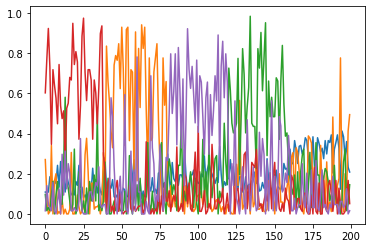

In [31]:
plt.plot(stab_maps[0])

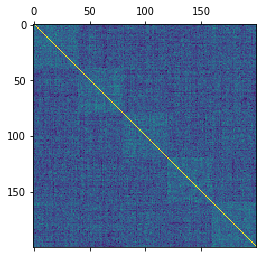

In [54]:
yp = pd.DataFrame(y.transpose())
plt.matshow(yp.corr())

In [ ]:
t0 = time.clock()
stab_maps, dwell_time = sca.recursive_cluster(y, n_clusters=5, n_states=1, subsample_size=20, n_jobs=-1,
                                              threshold_dice=0.5, threshold_stability=0.3, n_replications=100)
print(time.clock()-t0, "seconds process time")

In [ ]:
plt.plot(stab_maps)
dwell_time

In [ ]:
a.astype('float')[0]